In [1]:
from src.models.conv_model import build_model as build_conv_model
from src.data_loader.RNASeqLoader import RNASeqDataGenerator
import src.data_loader.combine_letter_profiles
from src.data_loader.RNASeqStructLoader import RNASeqStructDataGenerator
from src.callbacks.BatchSaver import BatchSaverCallback

Using TensorFlow backend.


In [ ]:
model = build_conv_model(101, 4, 128, 12, blocks=3, dil_rate=2, dropout=0.3)

In [ ]:
print(model.summary())

In [ ]:
train_generator = RNASeqDataGenerator("data/processed/train_data.hdf5", 1024)
validation_generator = RNASeqDataGenerator("data/processed/validation_data.hdf5", 1024)

In [ ]:
import tensorflow as tf
from time import time
checkpoint_filepath = 'models/DilatedConvNet-{}.h5'.format(time())
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
history = model.fit(x=train_generator, epochs=10, validation_data=validation_generator, callbacks=[model_checkpoint_callback], use_multiprocessing=True, workers=20)

In [2]:
from src.evaluator.evaluator import Evaluator
from tensorflow.keras.models import load_model

In [3]:
model = load_model("models/Struct-DialatedConvNet-11.15.20.h5")
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 101, 128)          13952     
_________________________________________________________________
batch_normalization (BatchNo (None, 101, 128)          512       
_________________________________________________________________
dropout (Dropout)            (None, 101, 128)          0         
_________________________________________________________________
max_pooling1d (Ma

In [10]:
test_generator = RNASeqStructDataGenerator("data/processed/test_data.hdf5", 1024)
ev = Evaluator(model, test_generator)

In [11]:
ev.evaluate()


 96%|█████████▋| 156/162 [03:31<00:08,  1.34s/it]


100%|██████████| 162/162 [03:41<00:00,  1.37s/it]

Spearman Correlation : 0.3175
Pearson Correlation  : 0.4785


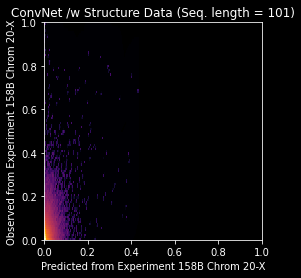


 96%|█████████▋| 156/162 [03:30<00:08,  1.35s/it]


100%|██████████| 162/162 [03:39<00:00,  1.35s/it]

Spearman Correlation : 0.3175
Pearson Correlation  : 0.4785


In [12]:
ev.generatePlot("ConvNet /w Structure Data (Seq. length = 101)")
ev.evaluate()